# NLP with Hotel Review, Part 1

The following notebook will serve as a breakdown of EDA, data augmentation, and preliminary modelling of the Hotel Review dataset.

In [213]:
# importing of basic libraries to be leveraged for EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [214]:
# reading in the Hotel Reviews dataset

df = pd.read_csv('Hotel_Reviews.csv')
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


## Part 1: Exploratory Data Analysis (EDA)

As with all data science projects, a core pillar of successful modeling is the assurance of clean and usable data. The Hotel_Reviews dataset is no different, and the first section of this notebook will be dedicated towards EDA.

### Q1A: What is the shape of the dataset?

The dataset shape represents the number of rows and columns that exist within the dataframe of interest. There are numerous methods and functions to find this information, but below we will simply use `pd.shape`.

In [215]:
# find shape of dataframe

df.shape

(515738, 17)

### Q1B: Convert reviews into integers from 1 to 10.

As seen below, both our target column `Reviewer_Score` and `Average_Score` are floating point numbers as opposed to integers. To remain simplicity, we will convert these two fields into integer objects, rounding the decimal appropriately. We will do this via `pd.astype()`.

In [216]:
#fetch breakdown of datatypes for each column in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [217]:
# changing dtypes of review score columns to int

df['Reviewer_Score'] = df['Reviewer_Score'].astype('int32')
df['Average_Score'] = df['Average_Score'].astype('int32')

In [218]:
# confirming proper changes took place

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  int32  
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

### Q1C: Reviewer Score Distributions

Prior to seeing the distributions, the usual expectations within categorical datasets is that the target variable has some semblance of a normal distribution. However, when the dataset contains reviews, it can sometimes be skewed towards extremes, since the main motivations behind a person providing reviews is either a very good or a very poor experience.

Below we will take a look at the distributions to gauge the distribution of our target variable.

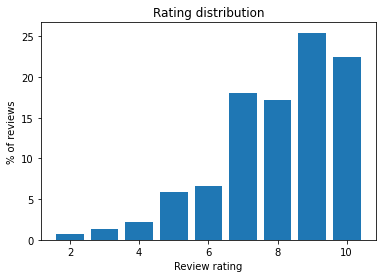

Class Imbalance: [0.01 0.01 0.02 0.06 0.07 0.18 0.17 0.25 0.22]


In [219]:
# getting set of unique review values (1 through 10) /
# and the percentage of reviews within each score

values, counts = np.unique(df['Reviewer_Score'], return_counts = True)
normalized_counts = counts / counts.sum()

plt.figure()
plt.bar(values, normalized_counts * 100)
plt.xlabel('Review rating')
plt.ylabel('% of reviews')
plt.title("Rating distribution")
plt.show()

print(f'Class Imbalance: {np.round(normalized_counts,2)}')

The actual distribution of review scores is neither what was expected or what is ideal for this analysis. The review scores are heavily skewed towards higher scores -- or more positive experiences and causes a clear class imbalance.

If this data is kept as is, this may skew model performance since many more written reviews and words used will be seen as positive. In other words, this data has the potential to create bias within the model. 

To combat this, we will create a binary scoring framework that is more strict. However, there are a few more steps needed before we move forward with the augmentation.

### Q2A: Identify numeric and non-numeric columns, and convert some non-numeric columns to numeric

As with all classification problems, we'll want to convert as many columns as possible into numeric columns so that the model can leverage these data points during fitting and training. Below, we will segment the dataset by dtype to see which columns we can convert to numeric columns, either through data manipulation or encoding.

In [220]:
#numeric columns

df.select_dtypes(['int', 'float'])

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
0,194,7,397,1403,11,7,2,52.360576,4.915968
1,194,7,0,1403,105,7,7,52.360576,4.915968
2,194,7,42,1403,21,9,7,52.360576,4.915968
3,194,7,210,1403,26,1,3,52.360576,4.915968
4,194,7,140,1403,8,3,6,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...
515733,168,8,14,2823,2,8,7,48.203745,16.335677
515734,168,8,11,2823,11,12,5,48.203745,16.335677
515735,168,8,19,2823,0,3,2,48.203745,16.335677
515736,168,8,0,2823,25,3,8,48.203745,16.335677


In [221]:
#non-numeric columns

df.select_dtypes('object')

,Hotel_Address,Review_Date,Hotel_Name,Reviewer_Nationality,Negative_Review,Positive_Review,Tags,days_since_review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,8/3/2017,Hotel Arena,Russia,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,8/3/2017,Hotel Arena,Ireland,No Negative,No real complaints the hotel was great great ...,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7/31/2017,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,"[' Leisure trip ', ' Family with young childre...",3 days
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7/31/2017,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7/24/2017,Hotel Arena,New Zealand,You When I booked with your company on line y...,Amazing location and building Romantic setting,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days
...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,8/30/2015,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,location,"[' Leisure trip ', ' Family with older childre...",704 day
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,8/22/2015,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,Breakfast was ok and we got earlier check in,"[' Leisure trip ', ' Family with young childre...",712 day
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,8/19/2015,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,No Positive,"[' Leisure trip ', ' Family with older childre...",715 day
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,8/17/2015,Atlantis Hotel Vienna,Mexico,No Negative,The rooms are enormous and really comfortable...,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day


#### Days Since Review

The most obvious column that can be converted from an object to an integer is `days_since_review`, which signifies the age of the review. If we removed the 'day' or 'days' string after the number, we can then convert this to a numeric column.

To do this, we will use the `.replace()` string function, which replaces a stated string object with a stated replacement.

In [222]:
# removing 'days' string
df['days_since_review'] = df['days_since_review'].str.replace(' days', '')

#removing 'day' string
df['days_since_review'] = df['days_since_review'].str.replace(' day', '')

#converting to int
df['days_since_review'] = df['days_since_review'].astype('int32')

#previewing results
df['days_since_review']

0           0
1           0
2           3
3           3
4          10
         ... 
515733    704
515734    712
515735    715
515736    717
515737    725
Name: days_since_review, Length: 515738, dtype: int32

#### Review Date

Review Date is another column that can be manipulated and converted into a numeric column, but with a few an extra step.

`Review_Date` is currently stored as an object, as opposed to datetime. We'll first need to convert it to datetime before performing any other conversions.

In [223]:
#converting Review_Date to datetime

df['Review_Date'] = pd.to_datetime(df['Review_Date'])

Now that the datetime object conversion is complete, we'll want to futher manipulate this data point so that it can be leveraged within the model fitting. To do this, we'll create 2 additional rows within the dataframe: `Review_Date_Month` and `Review_Date_Year`. Month and Year can both be good data points to leverage within this analysis. Day, without the additional context of Month, is not as useful.

While we could attempt a concatenation of Month and Day, or even leverage an epoch or unix datetime format, we'll only focus on Month and Year for right now.

In [224]:
#creating new columns for month and year, extracted from Review_date
df['Review_Date_Month'] = df['Review_Date'].dt.month
df['Review_Date_Year'] = df['Review_Date'].dt.year

#### Reviewer Nationality

Reviewer Nationality could be an important data point to take into account when performing modeling with text data. Although all interviews (or most) are written in English, there may be certain words or venacular that are unqiue and/or differ from one nationality to another.

We'll first determine the number of Nationalities included within the dataset to ensure it isn't too large or unreasonable to include.

In [225]:
#finding number of values for each unique nationality value
df['Reviewer_Nationality'].value_counts()

 United Kingdom               245246
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
                               ...  
 Cape Verde                        1
 Northern Mariana Islands          1
 Tuvalu                            1
 Guinea                            1
 Palau                             1
Name: Reviewer_Nationality, Length: 227, dtype: int64

While 227 is a non-negligible number of values, it can still be reasonably included in the dataset. Since there isn't an ordinal relationship between nationalities, we'll leverage `pd.get_dummies` to create dummy variables for each nationality.

In [226]:
#creating df of dummy variables for each of the nationality values in the dataset
dummy_df_nationality = pd.get_dummies(df['Reviewer_Nationality'])
dummy_df_nationality

,,Abkhazia Georgia,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica,...,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Wallis and Futuna,Yemen,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
515734,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
515735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
515736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [227]:
#concatenating the dummy variables into the original dataframe
df = pd.concat([df, dummy_df_nationality], axis = 1)

### Q3A: Convert Reviewer_Score into a Binary Column

As specified above, we had some potentially problematic issues with the distribution of review scores in the original dataset, since most reviews were skewed towards relatively positive scores.

To combat this issue, we will convert the `Reviewer_Score` column into a binary column with a much more strict criteria. Scores that are 9 and 10 will be classified as `1`, or positive, while all scores that are 8 and below will be classified as `0`, or negative.

In [228]:
#creating a copy of the dataframe for the binary review scores
binary_df = df.copy()
binary_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,...,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Wallis and Futuna,Yemen,Zambia,Zimbabwe
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,...,0,0,0,0,0,0,0,0,0,0
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,...,0,0,0,0,0,0,0,0,0,0
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,...,0,0,0,0,0,0,0,0,0,0
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,...,0,0,0,0,0,0,0,0,0,0
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-24,7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,...,0,0,0,0,0,0,0,0,0,0


In [229]:
#using np.where to properly map values
binary_df['Reviewer_Score'] = np.where(binary_df['Reviewer_Score'] >= 9, 1, 0)

Now that the binarization of `Reviewer_Score` is complete, let's take another look at the distribution to ensure that it is more ideal than the original review score distribution

<AxesSubplot:xlabel='Review Score', ylabel='# of Reviews'>

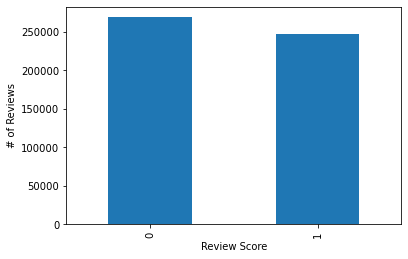

In [230]:
#creating a quick viz to see breakdown of distribution
binary_df['Reviewer_Score'].value_counts().plot(kind = 'bar', xlabel = 'Review Score', ylabel = '# of Reviews')

We now have a much more even distribution of review scores, further removing bias from our model.

## Q3B: Drop all non-numeric columns except for the Reviews

In the previous section, we converted a number of columns from non-numerical to numerical. Since the remaining non-numerical columns are of no use to use, we will only retrain the numerical columns, outside of the Reviews that we will use for the NLP modeling.

The `uint8` dtype, which was not included at first, will fetch the dummy variables that were concatenated into the original dataset.

In [231]:
#grabbing all values with int, float, and uint8 (from the dummy variables)
num_df = binary_df.select_dtypes(['int', 'float', 'uint8'])
num_df['Positive_Review'], num_df['Negative_Review'] = binary_df['Positive_Review'], binary_df['Negative_Review']
num_df.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,lat,lng,...,Vanuatu,Vatican City,Venezuela,Vietnam,Wallis and Futuna,Yemen,Zambia,Zimbabwe,Positive_Review,Negative_Review
0,194,7,397,1403,11,7,0,0,52.360576,4.915968,...,0,0,0,0,0,0,0,0,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...
1,194,7,0,1403,105,7,0,0,52.360576,4.915968,...,0,0,0,0,0,0,0,0,No real complaints the hotel was great great ...,No Negative
2,194,7,42,1403,21,9,0,3,52.360576,4.915968,...,0,0,0,0,0,0,0,0,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...
3,194,7,210,1403,26,1,0,3,52.360576,4.915968,...,0,0,0,0,0,0,0,0,Great location in nice surroundings the bar a...,My room was dirty and I was afraid to walk ba...
4,194,7,140,1403,8,3,0,10,52.360576,4.915968,...,0,0,0,0,0,0,0,0,Amazing location and building Romantic setting,You When I booked with your company on line y...


### Q3C: Split the data into train and test sets

Now that the preprocessing of our dataset is complete, the next step is to perform the encoding of the Positive and Negative reviews.

The first step is to split that dataset into training and test data. We want to perform the splitting of data prior to the vectorizing of the reviews mitigate the risk of the test set already being exposed to all of the vectorized vocabulary that is part of the dataset. If we leveraged the `CountVectorizer()` prior to the train_test_split, the model performance would be unrealistically high since the test set will have already seen all of the vocabulary used in the reviews.

In [232]:
#importing sklearn package for streamlined train/test segmentation

from sklearn.model_selection import train_test_split

X = num_df
y = num_df['Reviewer_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Q3D: Use Count Vectorizer to vectorize and Combine All Matrices

Count vectorization is a method of encoding vocabularies used within text data. We'll leverage this methodology to segment each unique word used in the reviews, creating separate columns and eventually providing us with the ability to identify commonly used positive and negative words.

In [233]:
#importing CountVectorizer from sklearn 

from sklearn.feature_extraction.text import CountVectorizer

#performing CountVectorizer on the Positive and Negative Reviews separately to have clear segmentation between /
#positive and negative vocabularies

#call CountVectorizer
bagofwords = CountVectorizer()

#fit vectorizer to training set of positive reviews
bagofwords.fit(X_train['Positive_Review'])

#transform data
X_train_transformed_PR = bagofwords.transform(X_train['Positive_Review'])

#same process for negative reviews
bagofwords = CountVectorizer()
bagofwords.fit(X_train['Negative_Review'])
X_train_transformed_NR = bagofwords.transform(X_train['Negative_Review'])

In [234]:
#fetching shape of each vector to gauge size/number of words
print(f'Positive Reviews Count Vector Shape: {X_train_transformed_PR.shape}')
print(f'Negative Reviews Count Vector Shape: {X_train_transformed_NR.shape}')

Positive Reviews Count Vector Shape: (412590, 45722)
Negative Reviews Count Vector Shape: (412590, 49691)


Without using any additional parameters within CountVectorizer, we see above that of the 412,590 records within the training set, there are 45,722 and 49,691 words used in positive and negative reviews, respectively.

However, since no parameters were specified, this includes all words such as filler words, also known as stop words. Additionally, it counts all words regardless of how commonly they are used.

### Q3E: Parameter adjustments using `stop_words` and `min_df`

To reduce the size of these vectors, we'll start to remove words that do not provide the model and analysis with value. Some of words that fall into this example are stop words such as pronouns, conjunctions, and other filler words. We can also add our own defined words to include within the `stop_words` parameter, but for right now, we'll stick with the predefined words that are defined within the scikitlearn package.

Another parameter that helps reduce the size of the data is `min_df`. This parameter allows us to set a threshold for the number of record a word must appear in to be included within the vector. For example, if a word is only used 2 or 3 times, it is most likely not helpful as we leverage this vectorized data as inputs into classification models.

For right now, we'll only use min_df, but there are other parameters such as `max_df` and `max_features`, which can either exclude words that occur more than a specified number of times and limit the number of vectors that are included in the output.

In [235]:
# define range of min_df values for comparison
min_range = [1,5,10,20]

for x in min_range:
    bagofwords = CountVectorizer(stop_words = 'english', min_df = x)
    bagofwords.fit(X_train['Positive_Review'])
    X_train_transformed_PR = bagofwords.transform(X_train['Positive_Review'])
    X_train_transformed_PR

    bagofwords = CountVectorizer(stop_words = 'english', min_df = x)
    bagofwords.fit(X_train['Negative_Review'])
    X_train_transformed_NR = bagofwords.transform(X_train['Negative_Review'])
    X_train_transformed_NR
    
    print(f'Positive Reviews Count Vector Shape with min_df of {x}: {X_train_transformed_PR.shape}')
    print(f'Negative Reviews Count Vector Shape with min_df of {x}: {X_train_transformed_NR.shape}')

Positive Reviews Count Vector Shape with min_df of 1: (412590, 45419)
Negative Reviews Count Vector Shape with min_df of 1: (412590, 49383)
Positive Reviews Count Vector Shape with min_df of 5: (412590, 11686)
Negative Reviews Count Vector Shape with min_df of 5: (412590, 13677)
Positive Reviews Count Vector Shape with min_df of 10: (412590, 7858)
Negative Reviews Count Vector Shape with min_df of 10: (412590, 9580)
Positive Reviews Count Vector Shape with min_df of 20: (412590, 5438)
Negative Reviews Count Vector Shape with min_df of 20: (412590, 6746)


We can see the drastic difference than `min_df` can make to the number of tokens, or words, that can in each vectorization output. Further tuning of this parameter can be done to find the most optimal value for the model relative to run-time and model performance. For now, we'll stick with a `min_df = 5`, since it performs an ample filtering of words without being overly restrictive.

In [236]:
#redefining min_df to 5

bagofwords = CountVectorizer(stop_words = 'english', min_df = 5)
bagofwords.fit(X_train['Positive_Review'])
X_train_transformed_PR = bagofwords.transform(X_train['Positive_Review'])

bagofwords = CountVectorizer(stop_words = 'english', min_df = 5)
bagofwords.fit(X_train['Negative_Review'])
X_train_transformed_NR = bagofwords.transform(X_train['Negative_Review'])

<412590x13677 sparse matrix of type '<class 'numpy.int64'>'
	with 3051203 stored elements in Compressed Sparse Row format>

Lastly, we'll convert these vectorized outputs and join the 3 matricies together to have a single unified dataset. We are now ready to leverage different classification algorithms to have a better understanding of sentiment dynamics surrounding hotel reviews.

In [237]:
#converting to dataframes to concatenate in single dataset
PR = pd.DataFrame(X_train_transformed_PR)
NR = pd.DataFrame(X_train_transformed_NR)
final_df = pd.concat([num_df, PR, NR], axis = 1)

# Appendix

Included in this appendix are analysis that were performed that did not make into the final dataset. Decided to make a separate appendix to retain a relevant and compact report, while leaving details of what turned out to be irrelevant analyses to the end.

---

In [239]:
df = pd.read_csv('Hotel_Reviews.csv')

#### Tags

There is an interesting field in this dataset known as `Tags`. It seems that this dataset contains a fixed list of pre-defined options that better describe the type of trip that was taken by the reviewer, such as the trip type, single/group type, lodging type, and other fields. Below is a pull of the first 20 set of tags in the dataset.

In [240]:
df['Tags'].head(20)

0     [' Leisure trip ', ' Couple ', ' Duplex Double...
1     [' Leisure trip ', ' Couple ', ' Duplex Double...
2     [' Leisure trip ', ' Family with young childre...
3     [' Leisure trip ', ' Solo traveler ', ' Duplex...
4     [' Leisure trip ', ' Couple ', ' Suite ', ' St...
5     [' Leisure trip ', ' Group ', ' Duplex Double ...
6     [' Leisure trip ', ' Group ', ' Duplex Twin Ro...
7     [' Leisure trip ', ' Couple ', ' Duplex Double...
8     [' Leisure trip ', ' Couple ', ' Duplex Double...
9     [' Leisure trip ', ' Couple ', ' Large King Ro...
10    [' Leisure trip ', ' Group ', ' Duplex Double ...
11    [' Business trip ', ' Solo traveler ', ' Duple...
12    [' Leisure trip ', ' Solo traveler ', ' Duplex...
13    [' Business trip ', ' Solo traveler ', ' Duple...
14    [' Leisure trip ', ' Family with young childre...
15    [' Leisure trip ', ' Couple ', ' Duplex Double...
16    [' Leisure trip ', ' Family with young childre...
17    [' Leisure trip ', ' Couple ', ' Duplex Do

At first, it seems that these values as lists of fixed values that could be useful for further model analysis. The ability to tie sentiment to the trip type can garner further insights to hotel operators in terms of narrowing-down potential improvements within certain areas of the hotel experience.

To get a better understanding of how many values are within each list, we'll utilize the `.str.len()` function, since some string operations can also be used on lists.

In [241]:
df['Tags'].str.len()

0          75
1          75
2         131
3          82
4          98
         ... 
515733     84
515734     97
515735    120
515736     76
515737     84
Name: Tags, Length: 515738, dtype: int64

The first issue we see here is that the field is being stored as a string object, as opposed to a list. Therefore, the `.len()` function is returning the number of characters of the entire list, as opposed to the number of objects within the list.

To combat this issue, we'll split the string be comma, which will in turn convert this string into a list. While extra formatting can be done to make it look more aesthetically pleasing, this solution provides us with a quick and easy way to determine if these tags can be further encoded and converted into numerical columns for modeling.

In [242]:
df['Tags'] = df['Tags'].str.split(', ')
df['Tags']

0         [[' Leisure trip ', ' Couple ', ' Duplex Doubl...
1         [[' Leisure trip ', ' Couple ', ' Duplex Doubl...
2         [[' Leisure trip ', ' Family with young childr...
3         [[' Leisure trip ', ' Solo traveler ', ' Duple...
4         [[' Leisure trip ', ' Couple ', ' Suite ', ' S...
                                ...                        
515733    [[' Leisure trip ', ' Family with older childr...
515734    [[' Leisure trip ', ' Family with young childr...
515735    [[' Leisure trip ', ' Family with older childr...
515736    [[' Leisure trip ', ' Group ', ' Standard Trip...
515737    [[' Leisure trip ', ' Family with young childr...
Name: Tags, Length: 515738, dtype: object

Now, we can determine if the length of these tags are consistent across all reviews, providing us with a structured way to segment and encode these tag values.

In [243]:
df['Tags'].str.len().value_counts()

5    297823
4    211564
3      5505
6       755
2        85
1         6
Name: Tags, dtype: int64

Unfortunately, it seems that these answers may be optional as part of the review submission. However, let's continue with EDA for this column to determine if tags can still be utilized in some facet.

We'll do so by creating a separate dataframe that splits these lists into separate columns.

In [244]:
tags_df = pd.DataFrame(df['Tags'].to_list(), columns = ['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5', 'Tag6'])
tags_df

,Tag1,Tag2,Tag3,Tag4,Tag5,Tag6
0,[' Leisure trip ',' Couple ',' Duplex Double Room ',' Stayed 6 nights '],None,None
1,[' Leisure trip ',' Couple ',' Duplex Double Room ',' Stayed 4 nights '],None,None
2,[' Leisure trip ',' Family with young children ',' Duplex Double Room ',' Stayed 3 nights ',' Submitted from a mobile device '],None
3,[' Leisure trip ',' Solo traveler ',' Duplex Double Room ',' Stayed 3 nights '],None,None
4,[' Leisure trip ',' Couple ',' Suite ',' Stayed 2 nights ',' Submitted from a mobile device '],None
...,...,...,...,...,...,...
515733,[' Leisure trip ',' Family with older children ',' 2 rooms ',' Stayed 5 nights '],None,None
515734,[' Leisure trip ',' Family with young children ',' Standard Triple Room ',' Stayed 2 nights '],None,None
515735,[' Leisure trip ',' Family with older children ',' 2 rooms ',' Stayed 4 nights ',' Submitted from a mobile device '],None
515736,[' Leisure trip ',' Group ',' Standard Triple Room ',' Stayed 3 nights '],None,None


On the surface, there seems to be consistency regarding the category that each of these tags belong to within the different tag columns. However, since there are a different number of tags within each submission, we may have issues in terms of the category of the tag and the column they will end up belonging to.

To fully determine this, we'll still move forward with creating dummy variables for each column. This way, we can see if the tag variable and the column each belong to retains some sort of consistency.

In [245]:
pd.get_dummies(tags_df)

,Tag1_[' Business trip ',Tag1_[' Couple ',Tag1_[' Couple '],Tag1_[' Family with older children ',Tag1_[' Family with young children ',Tag1_[' Family with young children '],Tag1_[' Group ',Tag1_[' Group '],Tag1_[' Leisure trip ',Tag1_[' Solo traveler ',...,Tag5_' Stayed 5 nights '],Tag5_' Stayed 6 nights ',Tag5_' Stayed 6 nights '],Tag5_' Stayed 7 nights ',Tag5_' Stayed 7 nights '],Tag5_' Stayed 8 nights ',Tag5_' Stayed 9 nights ',Tag5_' Stayed 9 nights '],Tag5_' Submitted from a mobile device '],Tag6_' Submitted from a mobile device ']
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
515734,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
515735,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
515736,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


We can now confirm that the different number of values within each list will render the incorporation of this data into the numerical dataset unrealistic, since the tag category variables consistency is incongruent with the columns they belong to. For example, within `Tag1`, we see Business Trip and Leisure Trip, but also the type of group such as Couple, Family with older children, etc.

In actuality, we can collect all of the unique values and create a for loop to place each variable type in an appropriate column. However, since its value is not fully understood, we will not consider this column for right now.